# SINGING VOICE TRANSCRIPTION USING DNN
Rigaud, 2016 - Reproduction of implementation and results comparision

## Data pre-processing


Data from MedleyDB - [Select vocal musics from MusicDelta_Reggae to Wolf_DieBekherte]

Each audio signal are converted to mono and resampled to 16kHz. (For what?)

Then, pre-decomposed applying a double-stage HPSS (in the article are described the reason [2.2])

First, input signal $s$ is decomposed into $h_1$ e $p_1$ using high-frequency resolution (window of 300 ms)

Second, $p_1$ is further decomposed into $h_2$ e $p_2$ using a low-frequency resolution (window of 30 ms)

In [18]:
# Import libraries and modules 
from librosa import *
import librosa.display
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [38]:
# Preprocess all files in MedleyDB
import os

path = "../MedleyDB/Audio/"

for filename in os.listdir(path):
    print (filename)
    example = "../MedleyDB/Audio/"+filename

StrandOfOaks_Spacestation_MIX.wav
Snowmine_Curfews_MIX.wav
TheDistricts_Vermont_MIX.wav
StevenClark_Bounty_MIX.wav
MusicDelta_Reggae_MIX.wav
PortStWillow_StayEven_MIX.wav
SweetLights_YouLetMeDown_MIX.wav
PurlingHiss_Lolita_MIX.wav
TheSoSoGlos_Emergency_MIX.wav
Wolf_DieBekherte_MIX.wav
Schumann_Mignon_MIX.wav
NightPanther_Fire_MIX.wav
MusicDelta_Rock_MIX.wav
Schubert_Erstarrung_MIX.wav
SecretMountains_HighHorse_MIX.wav
TheScarletBrand_LesFleursDuMal_MIX.wav
MusicDelta_Rockabilly_MIX.wav


In [49]:
y, sr = librosa.load(example, mono=True) # Converted to mono
print (y.shape)

y_16k = librosa.resample(y, sr, 16000)
sr = 16000

print (y_16k.shape)  # Re-sampled to 16kHz

(572179,)
(415187,)


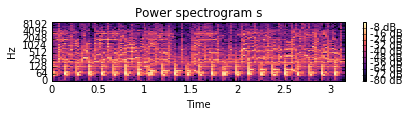

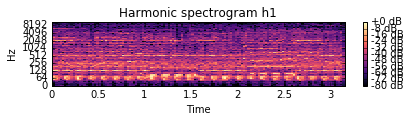

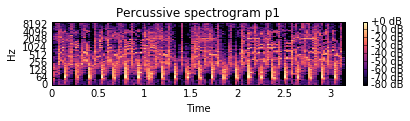

In [46]:
#D = librosa.stft(y_mono) # Hamming window 64ms 1024 samples com overlap 0,75 freq between 50Hz - 4000Hz
s = librosa.stft(y_16k, n_fft=4096, hop_length=int(4096*3/4), window=scipy.signal.hamming(4096))
h1, p1 = librosa.decompose.hpss(s)

plt.figure()
ax1 = plt.subplot(3,1,1)
librosa.display.specshow(librosa.amplitude_to_db(s, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram s')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

ax2 = plt.subplot(3,1,2, sharex=ax1)
librosa.display.specshow(librosa.amplitude_to_db(h1, ref=np.max), y_axis='log', x_axis='time')
plt.title('Harmonic spectrogram h1')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

ax2 = plt.subplot(3,1,3, sharex=ax1)
librosa.display.specshow(librosa.amplitude_to_db(p1, ref=np.max), y_axis='log', x_axis='time')
plt.title('Percussive spectrogram p1')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [50]:
import IPython
IPython.display.Audio(y_16k, rate=sr)

In [53]:
# Getting signal separated - need arguments of stft
h1_inverse = librosa.istft(h1, hop_length=int(4096*3/4), window=scipy.signal.hamming(4096))
IPython.display.Audio(h1_inverse, rate=sr)

In [54]:
p1_inverse = librosa.istft(p1, hop_length=int(4096*3/4), window=scipy.signal.hamming(4096))
IPython.display.Audio(p1_inverse, rate=sr)

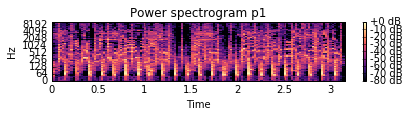

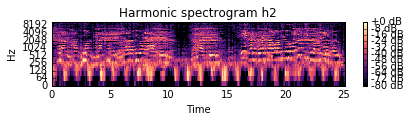

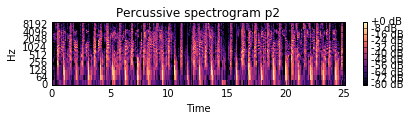

In [59]:
# Inverse STFT for p1
p1_inverse = librosa.istft(p1, hop_length=int(4096*3/4), window=scipy.signal.hamming(4096))

p1_32 = librosa.stft(p1_inverse, n_fft=512, hop_length=int(512*3/4), window=scipy.signal.hamming(512))
h2, p2 = librosa.decompose.hpss(p1_32)

plt.figure()
ax1 = plt.subplot(3,1,1)
librosa.display.specshow(librosa.amplitude_to_db(p1, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram p1')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

ax2 = plt.subplot(3,1,2, sharex=ax1)
librosa.display.specshow(librosa.amplitude_to_db(h2, ref=np.max), y_axis='log', x_axis='time')
plt.title('Harmonic spectrogram h2')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

ax2 = plt.subplot(3,1,3, sharex=ax1)
librosa.display.specshow(librosa.amplitude_to_db(p2, ref=np.max), y_axis='log', x_axis='time')
plt.title('Percussive spectrogram p2')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [60]:
h2_inverse = librosa.istft(h2, hop_length=int(512*3/4), window=scipy.signal.hamming(512))
IPython.display.Audio(h2_inverse, rate=sr)

In [61]:
p2_inverse = librosa.istft(p2, hop_length=int(512*3/4), window=scipy.signal.hamming(512))
IPython.display.Audio(p2_inverse, rate=sr)

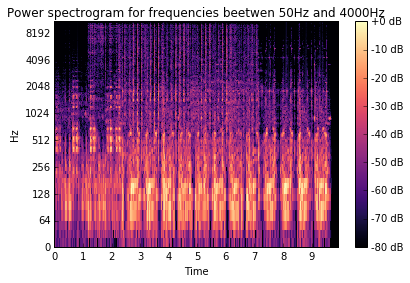

AttributeError: Unknown property ylim

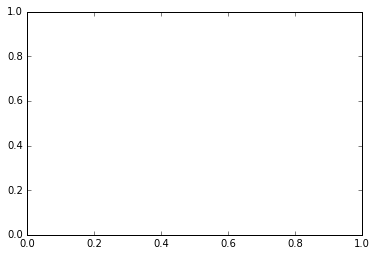

In [28]:
### Input for F0-Estimation DNN

# Discarting frequencies
p1_toF0_inverse = librosa.istft(p1)
p1_toF0 = librosa.stft(p1_toF0_inverse, n_fft=1024, hop_length=int(1024*3/4), window=scipy.signal.hamming(1024))
p1_toF0_log = librosa.amplitude_to_db(p1_toF0, ref=np.max)

librosa.display.specshow(p1_toF0_log, y_axis='log', x_axis='time')
plt.title('Power spectrogram for frequencies beetwen 50Hz and 4000Hz')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

librosa.display.specshow(p1_toF0_log, x_axis='time', y_axis='linear', ylim=[100, 1000]) # verify these values of cut
plt.title('Power spectrogram for frequencies beetwen 50Hz and 4000Hz')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

## Falta rescalar o spectrograma entre 0 e 1

In [24]:
print(p1_toF0_log.shape)

(513, 427)


(236.621-19.7842j) (-232.908-39.1239j)


/home/compmus/anaconda3/lib/python3.5/site-packages/librosa/display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


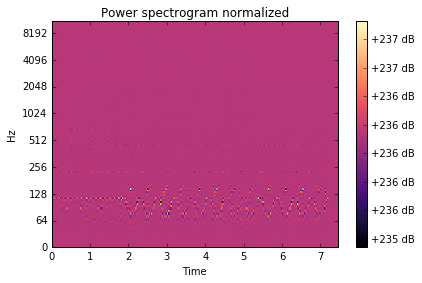

(1+0j)


In [35]:
s_log = s
s_max = s_log.max()
s_min = s_log.min()

print (s_max, s_min)

librosa.display.specshow(((s_log/s_max) - s_min), y_axis='log', x_axis='time')
plt.title('Power spectrogram normalized')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

print ((s_log/s_max).max())

In [ ]:
# Calculate labels to F0-Estimation
# C#2  -  C#6 - 193 labels (1/8 de tom)

hztomidi = 12 * (np.log2(np.atleast_1d(frequencies)) - np.log2(440.0)) + 69

## Associate labels for each frame

Get each frame from annotation and associate to a label [1-193]

Get each frame from spectrograms and put it on a vector

Write a .csv file with delimiter ","

### The input for the VAD was:

### The input for the F0-Estimator was: